## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [148]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [149]:
dff= pd.read_csv('ab.csv')
dff.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [150]:
#here we want to delete unnecessary columns
df=dff.drop(["timestamp"], axis= 1)
df.head()

,user_id,group,landing_page,converted
0,851104,control,old_page,0
1,804228,control,old_page,0
2,661590,treatment,new_page,0
3,853541,treatment,new_page,0
4,864975,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [151]:
index=df.index
number_of_rows= len(index)
print(number_of_rows)

294478


c. The number of unique users in the dataset.

In [152]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [153]:
from collections import Counter
T1= Counter(df['converted'])
print(T1)


Counter({0: 259241, 1: 35237})


In [154]:
#A simple way to find the ratio of converterteds
T2= (35237/(259241+35237))*100
print("The proportion of users converted is",T2,"%")

The proportion of users converted is 11.96591935560551 %


e. The number of times the `new_page` and `treatment` don't line up.

In [155]:
#here we can see that the number of times the new_page and treatment don't line up based on(control_New page,treatment_Old page).
df.groupby(["group","landing_page"]).count()

user_id  converted
group     landing_page                    
control   new_page         1928       1928
          old_page       145274     145274
treatment new_page       145311     145311
          old_page         1965       1965

In [156]:
control_New= 1928
treatment_Old= 1965
sum=control_New+treatment_Old
print("The number of times the `new_page` and `treatment` don't line up is: ",sum)

The number of times the `new_page` and `treatment` don't line up is:  3893


f. Do any of the rows have missing values?

In [157]:
#we note here that we do not have any missing values based on the following code..
print(df.isnull().sum())

user_id         0
group           0
landing_page    0
converted       0
dtype: int64


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

At this point, we will store the data in (df2)..

In [158]:
minus_one=df.loc[(df.group =='control')&(df.landing_page =='new_page')]
df2=df.drop(df.loc[(df.group =='control')&(df.landing_page =='new_page'), ].index,axis=0,errors='ignore',inplace=False)

In [159]:
minus_one=df.loc[(df.group =='treatment')&(df.landing_page =='old_page')]
df2=df2.drop(df2.loc[(df2.group =='treatment')&(df2.landing_page =='old_page'), ].index,axis=0,errors='ignore',inplace=False)

In [160]:
df2.head()

,user_id,group,landing_page,converted
0,851104,control,old_page,0
1,804228,control,old_page,0
2,661590,treatment,new_page,0
3,853541,treatment,new_page,0
4,864975,control,old_page,1


In [161]:
index=df2.index
number_of_rows= len(index)
print(number_of_rows)

290585


In [162]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [163]:
df2['user_id'].nunique()

290584

We can see here that the number of rows at the top was 290585 and for the unique rows here, we see that they are less than the rows by only one rows, and this indicates that there is a repetition of one of the rows.

lets see.. 

b. There is one **user_id** repeated in **df2**.  What is it?

In [164]:
#here we can see the repeated rows.
df2.user_id[df2.user_id.duplicated()]

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [165]:
df2[df2['user_id']==773192]

,user_id,group,landing_page,converted
1899,773192,treatment,new_page,0
2893,773192,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.


One of the solutions for recurring rows is to delete one of these rows and be satisfied with one of them.

So let's delete one of the rows.. 

In [166]:
df2.drop([2893],axis=0,inplace=True)

In [167]:
df2.head()

,user_id,group,landing_page,converted
0,851104,control,old_page,0
1,804228,control,old_page,0
2,661590,treatment,new_page,0
3,853541,treatment,new_page,0
4,864975,control,old_page,1


In [168]:
#We can see that the number of rows has been reduced by one.
index=df2.index
number_of_rows= len(index)
print(number_of_rows)

290584


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [169]:
from collections import Counter
M1= Counter(df2['converted'])
print(M1)

Counter({0: 255831, 1: 34753})


In [170]:
M2= (34753/(34753+255832))
print("The probability of converted is",M2)

The probability of converted is 0.11959667567149027


b. Given that an individual was in the `control` group, what is the probability they converted?

In [171]:
df2.groupby(["group","converted"]).count()

user_id  landing_page
group     converted                       
control   0           127785        127785
          1            17489         17489
treatment 0           128046        128046
          1            17264         17264

In [172]:
C_C=17489/(17489+127785)
print(C_C)

0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [173]:
T_C=17264/(17264+128046)
print(T_C)

0.11880806551510564


d. What is the probability that an individual received the new page?

In [174]:
from collections import Counter
qq= Counter(df2['landing_page'])
print(qq)

Counter({'new_page': 145310, 'old_page': 145274})


In [175]:
N_P=145310/(145310+145274)
print(N_P)

0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

Inference: 

We note through the previous steps that the probability of individual conversion in the control group is 0.1203863045004612 and the probability of individual conversion in a treatment group is equal to 0.0.11880806551510564, so we see that the probability of conversions in the control group is greater than those conversions in the treatment group. 

We can note that the ratio of the new page for the treatment group is 0.5, and therefore the proportion of the old page for the control groub will be similar, so the numbers are equal for both, and thus we make sure that there is no bias. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

H<SUB>0</SUB>:P<SUB>new</SUB><=P<SUB>old</SUB>


H<SUB>1</SUB>:P<SUB>new</SUB>>P<SUB>old</SUB>



`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [176]:
from collections import Counter
Con= Counter(df2['converted'])
print(Con)

Counter({0: 255831, 1: 34753})


In [177]:
P_New= (34753/(34753+255831))
print(P_New)

0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [178]:
P_Old= (34753/(34753+255831))
print(P_Old)

0.11959708724499628


c. What is $n_{new}$?

In [179]:
from collections import Counter
num= Counter(df2['landing_page'])
print(num)

Counter({'new_page': 145310, 'old_page': 145274})


In [180]:
N_new=145310
print(N_new)

145310


d. What is $n_{old}$?

In [181]:
N_old=145274
print(N_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [182]:
new_page_converted  = np.random.choice([1,0],size =N_new ,p=[P_New,(1-P_New)]).mean()
new_page_converted

0.11995733259927052

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [183]:
old_page_converted  = np.random.choice([1,0],size =N_old ,p=[P_Old,(1-P_Old)]).mean()
old_page_converted


0.11978055261092832

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [184]:
print(new_page_converted - old_page_converted)

0.00017677998834220165


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [185]:
p_diffs, New, Old= [], [], []
for _ in range (10000):
    New  = np.random.choice([1,0],size =N_new ,p=[P_New,(1-P_New)]).mean()
    Old  = np.random.choice([1,0],size =N_old ,p=[P_Old,(1-P_Old)]).mean()
    D_V = New - Old 
    p_diffs.append(D_V)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

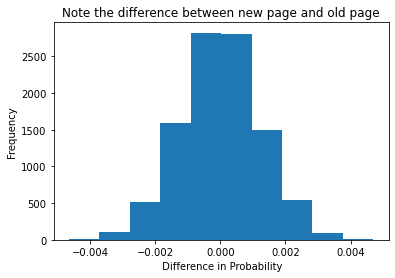

In [186]:
plt.hist(p_diffs);
plt.title("Note the difference between new page and old page")
plt.xlabel(' Difference in Probability')
plt.ylabel('Frequency');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [187]:
obser_diff = (df2['group'][(df2['group'] == 'treatment') & (df2['converted'] == 1)].count() / 
            df2['group'][df2['group'] == 'treatment'].count() - df2['group'][(df2['group'] == 'control') 
                                                                             & (df2['converted'] == 1)].count() / 
            df2['group'][df2['group'] == 'control'].count())
obser_diff

-0.0015782389853555567

In [188]:
#We can see the difference between(p_diffs)that is greater than(obs_diff)..
(p_diffs > obser_diff).mean()

0.903

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?


p_diffs:
The difference between the converted rates of the new page and the old page, for our dataset.

obser_diff:
The simulated difference between the converted rates of the new page and the old page, based on 10,000 simulated samples.

It is known that $\alpha$ has a value of 0.05, and through the previous step, we see that the P_Value is equal to 0.9047, so we see that (P_Value> $\alpha$), therefore, we cannot reject the null hypothesis. 



l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [189]:
import statsmodels.api as sm

convert_old =df2['group'][(df2['group'] == 'control') & (df2['converted'] == 1)].count()  
convert_new =df2['group'][(df2['group'] == 'treatment') & (df2['converted'] == 1)].count()
n_old =df2['group'][df2['group'] == 'control'].count()
n_new =df2['group'][df2['group'] == 'treatment'].count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [190]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')

In [191]:
z_score

-1.3109241984234394

In [192]:
p_value

0.9050583127590245

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?


p-value= 0.9050583127590245

There is a 90.50% chance that the conversion rates we collected for the new page are <= to those of the old page.


z-score= -1.3109241984234394

The z-score includes the same information but expresses it in terms of standard deviations.


Therefore, we conclude that we should not reject the null hypothesis, so we see that it is the same conclusion mentioned in Part j, which is the number of rejecting the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [193]:
#First we will Create intercept column..
df2['intercept']=1

#Second Create dummies..
df2[['ab_page', 'ab_page_dummy']] = pd.get_dummies(df2['landing_page'])
df2 = df2.drop(['ab_page_dummy'], axis=1)


#Finally, we include df2 after the additions..
df2.head()


,user_id,group,landing_page,converted,intercept,ab_page
0,851104,control,old_page,0,1,0
1,804228,control,old_page,0,1,0
2,661590,treatment,new_page,0,1,1
3,853541,treatment,new_page,0,1,1
4,864975,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [194]:
Logistic_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
result =Logistic_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [195]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 14 Aug 2021   Pseudo R-squ.:               8.077e-06
Time:                        13:29:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

H<SUB>0</SUB>: P<SUB>new</SUB> - P<SUB>old</SUB> = 0


H<SUB>1</SUB>: P<SUB>new</SUB> - P<SUB>old</SUB> != 0

The difference between the P_value in the logistic regression and the previous one is that in the logistic regression two sides Z_test are taken, while the previous one is take one side.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?


We conclude here that the variables (groub) and (converted) have no relationship between them and the reason is that our null hypothesis was not rejected. 
Therefore, we can do multiple logistic regression for the other variables to see if they are effective. 



g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [196]:
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [197]:
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [198]:
df_new.head()

,country,group,landing_page,converted,intercept,ab_page
user_id,,,,,,
834778,UK,control,old_page,0,1,0
928468,US,treatment,new_page,0,1,1
822059,UK,treatment,new_page,1,1,1
711597,UK,control,old_page,0,1,0
710616,UK,treatment,new_page,0,1,1


In [199]:
### Create the necessary dummy variables
df_new[['UK','US']] = pd.get_dummies(df_new['country'])[['UK','US']]

In [200]:
### Fit Your Linear Model And Obtain the Results
countries_model = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','UK','US']])
result = countries_model.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [201]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 14 Aug 2021   Pseudo R-squ.:               2.323e-05
Time:                        13:29:12   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [202]:
df_new['UK1'] = df_new['UK'] * df_new['ab_page']
df_new['US1'] = df_new['US'] * df_new['ab_page']
df_new.head()

,country,group,landing_page,converted,intercept,ab_page,UK,US,UK1,US1
user_id,,,,,,,,,,
834778,UK,control,old_page,0,1,0,1,0,0,0
928468,US,treatment,new_page,0,1,1,0,1,0,1
822059,UK,treatment,new_page,1,1,1,1,0,1,0
711597,UK,control,old_page,0,1,0,1,0,0,0
710616,UK,treatment,new_page,0,1,1,1,0,1,0


In [203]:
mod1 = sm.Logit(df_new['converted'],df_new[['intercept','UK1','US1','ab_page','UK','US']])
result2 = mod1.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sat, 14 Aug 2021   Pseudo R-squ.:               3.482e-05
Time:                        13:29:15   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
UK1            0.0783      0.057      1.378      0.168      -0.033       0.190
US1            0.0469      0.054      0.872      0.383      -0.059       0.152
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
==============================================================================
"""

#### Conclusions:

We have done multiple logistic regression for each of US and UK with converted and therefore we can see that the value of P_value is greater than $\alpha$, which means that we do not rejected the null hypothesis and this indicates not existence of a relationship between (US&converted) and a relationship between (UK&converted). 

So we can see that the **country** has no effect on the converted because (P_value > $\alpha$).

We can also see that the number of converted for the old page is slightly greater than the new page with a difference (0.00017677998834220165) and the percentage of converted for the old page is (0.11959708724499628) and the new page (0.11959708724499628).

                                                        ---END---